In [269]:
from onset.utilities.plotters import *
import os
from itertools import cycle
from itertools import product

os.chdir("/home/mhall/topology-programming")


def export_legend(legend, outfile, pdf=False):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(
        fig.dpi_scale_trans.inverted()
    )
    fig.savefig(outfile + "-legend.jpg", dpi="figure", bbox_inches=bbox)
    if pdf:
        fig.savefig(outfile + "-legend.pdf", dpi="figure", bbox_inches=bbox)


def my_barplot(
    df,
    net,
    candidate_link_choice,
    time_limit,
    x,
    y,
    hue,
    outfile="test",
    pdf=False,
):
    # print("x = ", x)
    # print("y = ", y)
    # print("hue = ", hue)
    # print("net = ", net)
    # print("time_limit = ", time_limit)
    # print("candidate_link_choice = ", candidate_link_choice)
    if net == "Campus":
        palette = sns.color_palette(palette="Pastel1")[3:6]
    if net == "Regional":
        palette = sns.color_palette(palette="Pastel1")[:3]
    fig, ax = plt.subplots(figsize=(9, 5))
    df = df[df["Candidate Link Choice Method"] == candidate_link_choice]
    df = df[df["Time Limit (m)"] == time_limit]
    sns.barplot(
        x=x,
        y=y,
        hue=hue,
        data=df,
        palette=palette,
        linewidth=0.1,
        edgecolor="black",
    )
    hatches = cycle(["///", "x", "o"])
    num_bar_types = len(df[hue].unique())
    num_bar_groups = len(df[x].unique())
    legend_patches = [p for p in ax.patches[-1 * num_bar_types :]]
    # print("patches: ", [str(p) for p in ax.patches])
    for i, patch in enumerate(ax.patches):
        if i % num_bar_groups == 0:
            hatch = next(hatches)
        patch.set_hatch(hatch)
        patch.set_linewidth(3)

    legend_patches = [p for p in ax.patches[-3:]]
    for p in legend_patches:
        p.set_hatch(hatch)
        hatch = next(hatches)
    # plt.figtext(
    #     0.47,
    #     0.95,
    #     f"{net}\nLink Choice:{candidate_link_choice} Time Limit: {time_limit} min",
    #     ha="center",
    #     va="top",
    # )

    legend = ax.legend(
        handles=legend_patches,
        labels=["1 ftx", "2 ftx", "3 ftx"],
        loc=3,
        ncol=3,
        title="",
        facecolor="white",
        framealpha=1,
        edgecolor="white",
        fancybox=False,
    )

    if outfile:
        export_legend(legend, outfile)
        legend.remove()
        # plt.tight_layout()
        plt.savefig(outfile + ".jpg")
        if pdf:
            plt.savefig(outfile + ".pdf")
            print("Saved figure to: " + outfile + ".pdf")
    plt.close()

In [241]:
from itertools import product

networks = ["Campus", "Regional"]
tes = ["mcf", "ecmp"]
ftxs = [1, 2, 3]
top_ks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
metrics = ["MaxExpCongestion"]

df = pd.DataFrame(
    columns=[
        "Network",
        "Routing",
        "Ftx",
        "Top_k",
        "Metric",
        "Total Solutions",
        "Value",
    ]
)
for net, te, ftx, top_k, metric in product(
    networks, tes, ftxs, top_ks, metrics
):
    data_file = f"data/reports/{net}_{te}_{ftx}_{top_k}_{metric}.dat"
    values = np.loadtxt(data_file)

    column_name = f"{net}_{te}_{ftx}_{top_k}_{metric}"

    # Add rows to the DataFrame
    for value in values:
        # df = pd.concat([df, pd.DataFrame({
        #     "Network": net,
        #     "Routing": te,
        #     "Ftx": ftx,
        #     "Top_k": top_k,
        #     "Metric": metric,
        #     "Value": value
        # })], ignore_index=True)
        data_dict = {
            "Network": net,
            "Routing": te,
            "Ftx": int(ftx),
            "Top_k": int(top_k),
            "Metric": metric,
            "Total Solutions": len(values),
            "Value": float(value),
        }
        df = pd.concat(
            [df, pd.DataFrame([data_dict], columns=data_dict.keys())],
            ignore_index=True,
        )

FileNotFoundError: data/reports/Campus_mcf_1_10_MaxExpCongestion.dat not found.

In [31]:
df

,Network,Routing,Ftx,Top_k,Metric,Value
0,Campus,mcf,1,10,MaxExpCongestion,0.474167
1,Campus,mcf,1,10,MaxExpCongestion,0.474167
2,Campus,mcf,1,10,MaxExpCongestion,0.474167
3,Campus,mcf,1,10,MaxExpCongestion,0.474167
4,Campus,mcf,1,10,MaxExpCongestion,0.474167
...,...,...,...,...,...,...
8435,Regional,ecmp,3,100,MaxExpCongestion,0.695736
8436,Regional,ecmp,3,100,MaxExpCongestion,0.695736
8437,Regional,ecmp,3,100,MaxExpCongestion,0.695736
8438,Regional,ecmp,3,100,MaxExpCongestion,0.695736


<Axes: xlabel='Top_k', ylabel='Value'>

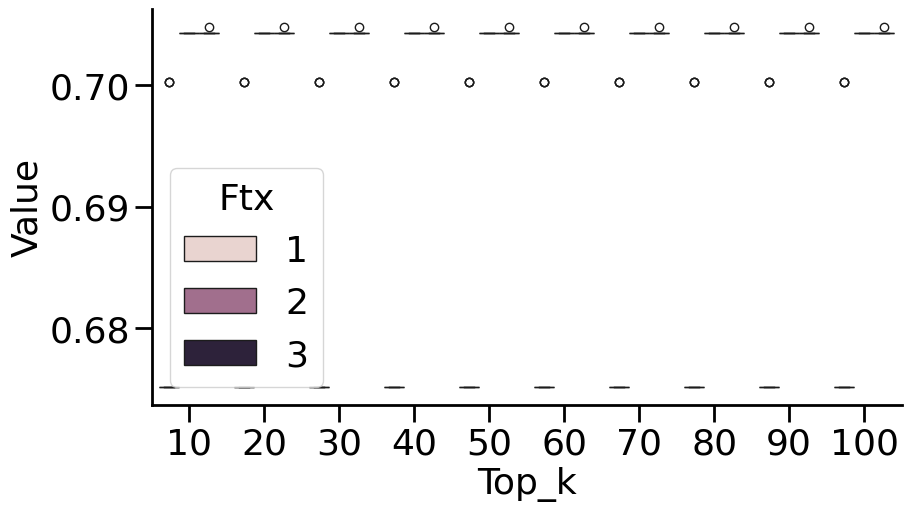

In [39]:
fix, ax = plt.subplots(figsize=(9, 5))
regional = df[df["Network"] == "Regional"]
regional = regional[regional["Routing"] == "mcf"]
reg_ftx_3 = regional[regional["Ftx"] == 3]
sns.boxplot(
    regional, x=regional["Top_k"], y=regional["Value"], hue=regional["Ftx"]
)

<Axes: xlabel='Top_k', ylabel='Total Solutions'>

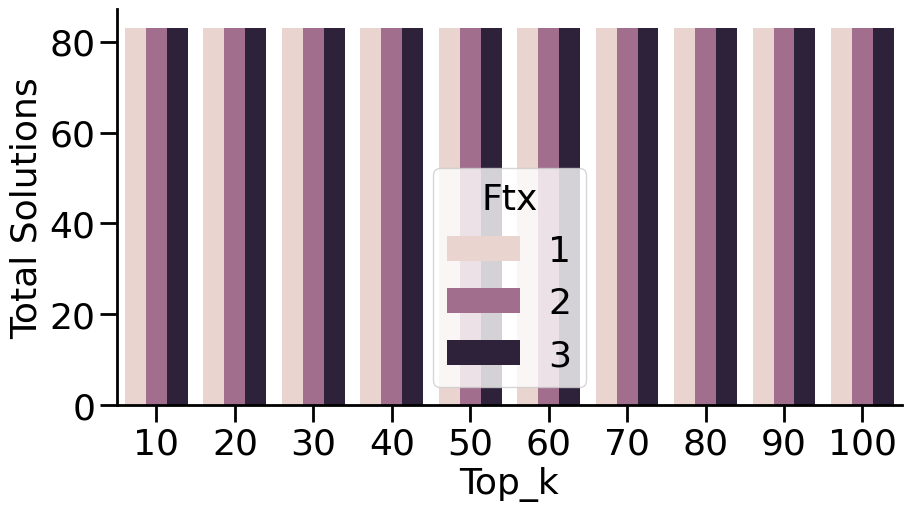

In [44]:
fix, ax = plt.subplots(figsize=(9, 5))
regional = df[df["Network"] == "Regional"]
regional = regional[regional["Routing"] == "ecmp"]
reg_ftx_3 = regional[regional["Ftx"] == 3]
sns.barplot(
    regional,
    x=regional["Top_k"],
    y=regional["Total Solutions"],
    hue=regional["Ftx"],
)

Text(0.5, 1.0, 'Regional-mcf')

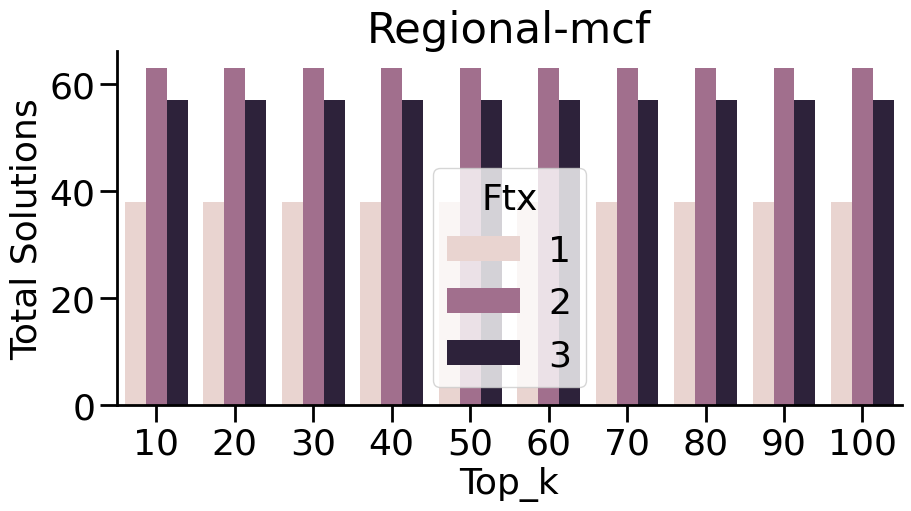

In [59]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Regional"
routing = "mcf"
net_df = df[df["Network"] == net]
net_df_routing = net_df[net_df["Routing"] == routing]
sns.barplot(
    net_df_routing,
    x=net_df_routing["Top_k"],
    y=net_df_routing["Total Solutions"],
    hue=net_df_routing["Ftx"],
)


plt.title(f"{net}-{routing}")

Text(0.5, 1.0, 'Campus-mcf')

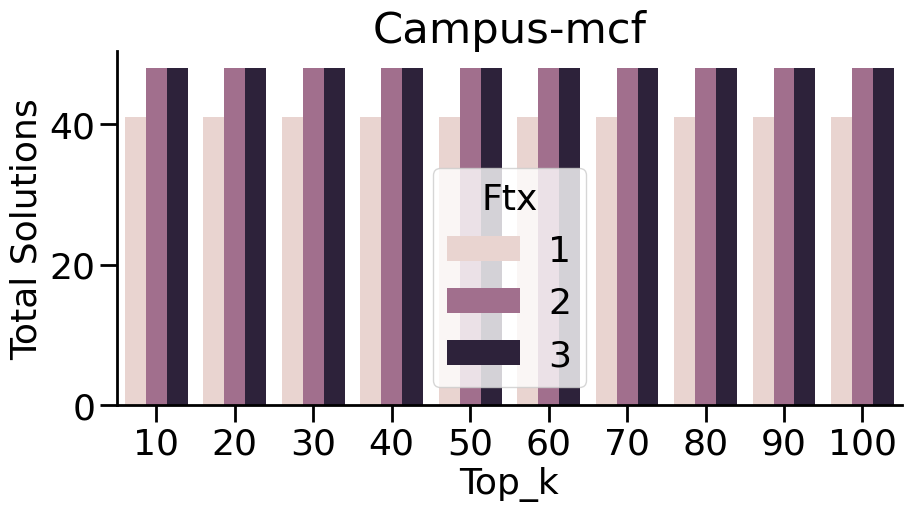

In [55]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
routing = "mcf"
net_df = df[df["Network"] == net]
net_df_routing = net_df[net_df["Routing"] == routing]
sns.barplot(
    net_df_routing,
    x=net_df_routing["Top_k"],
    y=net_df_routing["Total Solutions"],
    hue=net_df_routing["Ftx"],
)


plt.title(f"{net}-{routing}")

Text(0.5, 1.0, 'Campus-mcf')

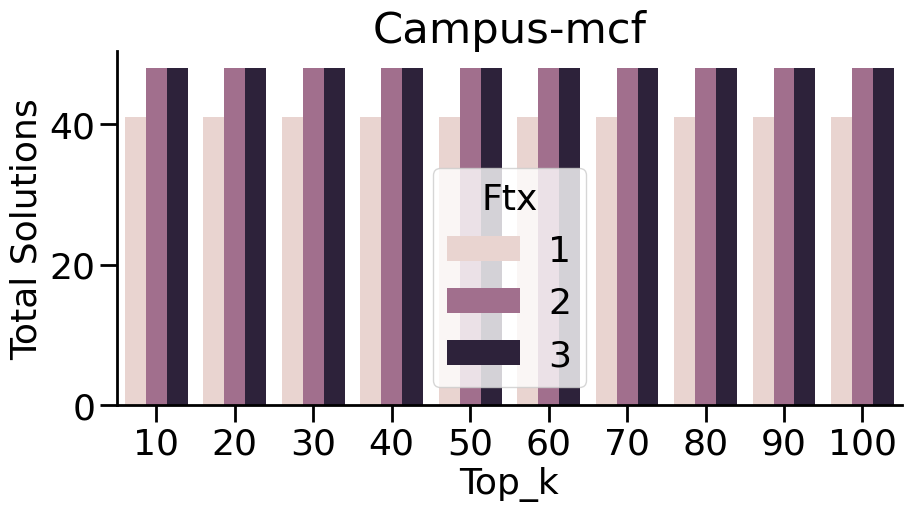

In [60]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
routing = "mcf"
net_df = df[df["Network"] == net]
net_df_routing = net_df[net_df["Routing"] == routing]
sns.barplot(
    net_df_routing,
    x=net_df_routing["Top_k"],
    y=net_df_routing["Total Solutions"],
    hue=net_df_routing["Ftx"],
)


plt.title(f"{net}-{routing}")

Text(0.5, 1.0, 'Regional-ecmp')

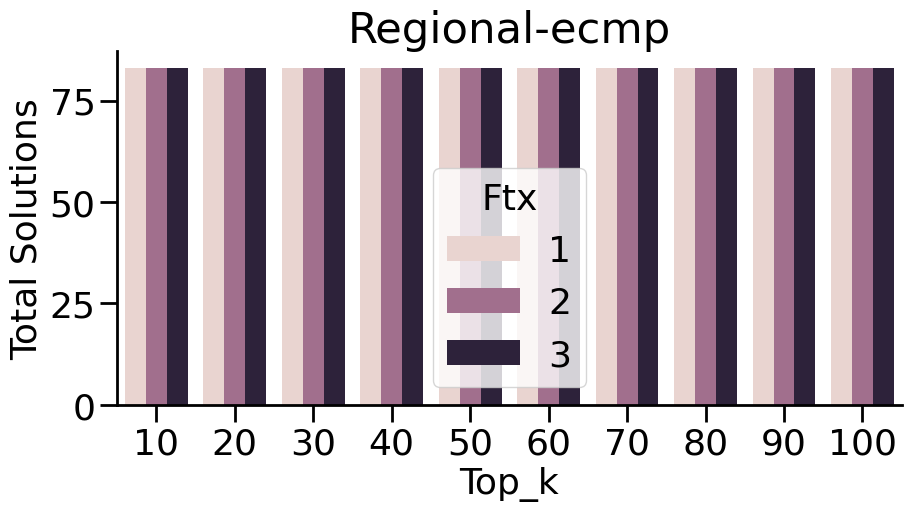

In [57]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Regional"
routing = "ecmp"
net_df = df[df["Network"] == net]
net_df_routing = net_df[net_df["Routing"] == routing]
sns.barplot(
    net_df_routing,
    x=net_df_routing["Top_k"],
    y=net_df_routing["Total Solutions"],
    hue=net_df_routing["Ftx"],
)


plt.title(f"{net}-{routing}")

# 1/25/2024
## Doppler Experiment. 

        network = ["Campus", "Regional"]    
        traffic = ["background"]
        scale = ["0.5"]
        te = ["mcf"]
        tp = ["Doppler"]
        top_k = [10 * i for i in range(11)]
        n_ftx = [1, 2, 3]
        use_cached_result = [True]
        candidate_link_choice_method = ["conservative", "max"]


In [13]:
campus_df = pd.read_csv(
    "data/archive/1-25-24/reports/mcf-Doppler-Campus-background.csv"
)
regional_df = pd.read_csv(
    "data/archive/1-25-24/reports/mcf-Doppler-Regional-background.csv"
)

Text(0.5, 1.0, 'Campus-mcf')

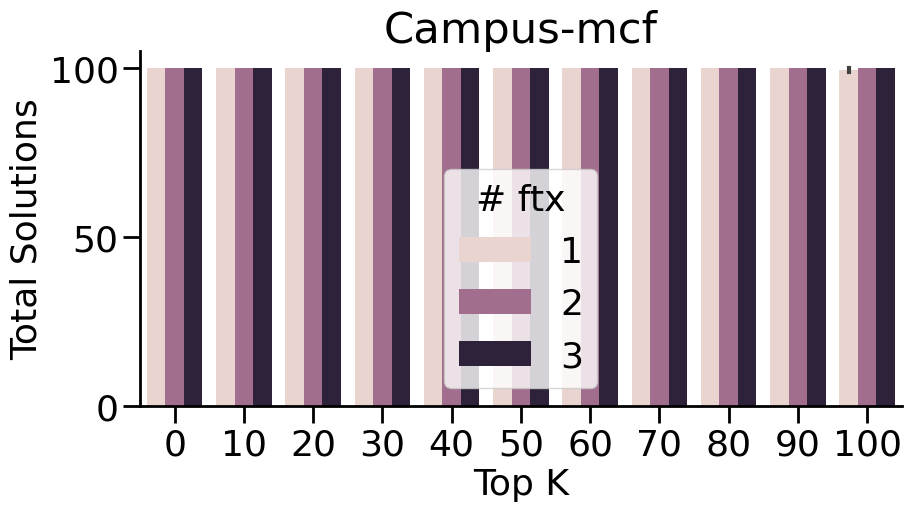

In [11]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
routing = "mcf"
net_df = campus_df[]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Total Solutions"],
    hue=net_df["# ftx"],
)


plt.title(f"{net}-{routing}")

Text(0.5, 1.0, 'Regional-mcf')

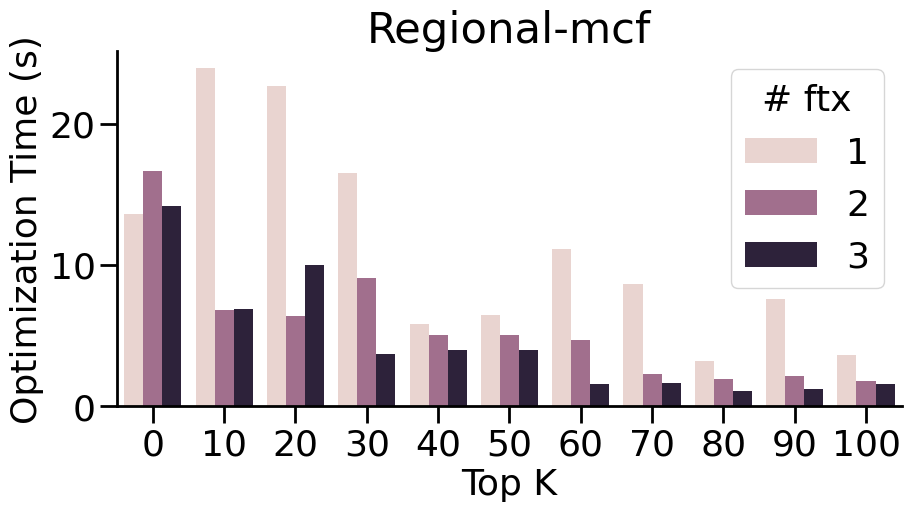

In [18]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Regional"
routing = "mcf"
net_df = campus_df[campus_df["Candidate Link Choice Method"] == "conservative"]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Optimization Time"],
    hue=net_df["# ftx"],
)

plt.ylabel("Optimization Time (s)")
plt.title(f"{net}-{routing}-conservative")

Text(0.5, 1.0, 'Regional-mcf-max')

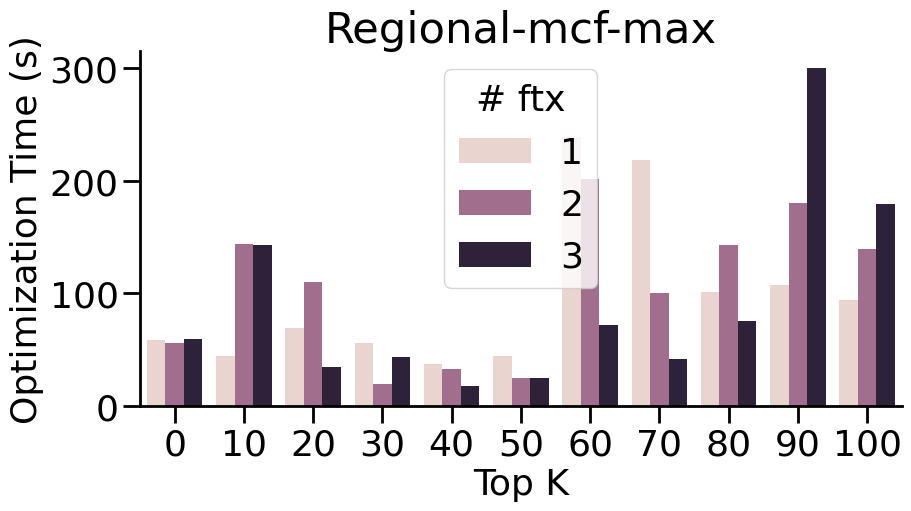

In [19]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Regional"
routing = "mcf"
net_df = campus_df[campus_df["Candidate Link Choice Method"] == "max"]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Optimization Time"],
    hue=net_df["# ftx"],
)

plt.ylabel("Optimization Time (s)")
plt.title(f"{net}-{routing}-max")

Text(0.5, 1.0, 'Campus-mcf-conservative')

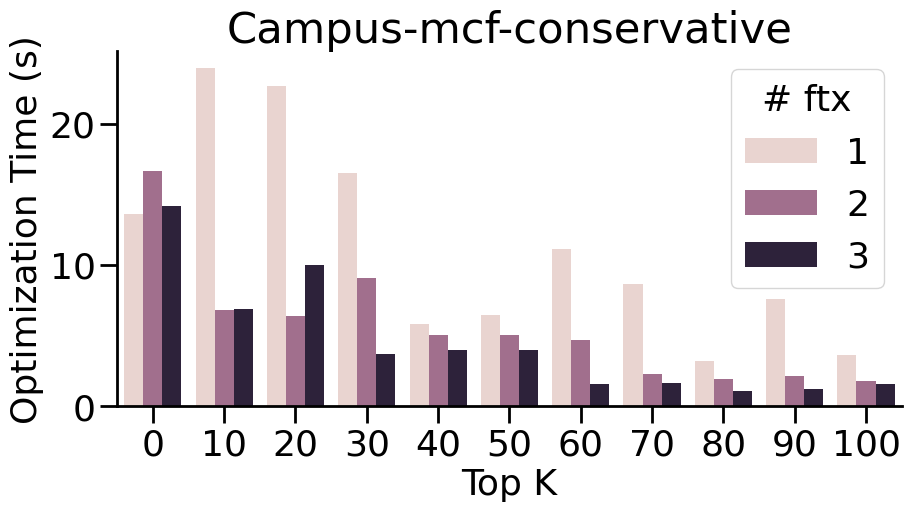

In [20]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
routing = "mcf"
net_df = campus_df[campus_df["Candidate Link Choice Method"] == "conservative"]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Optimization Time"],
    hue=net_df["# ftx"],
)

plt.ylabel("Optimization Time (s)")
plt.title(f"{net}-{routing}-conservative")

Text(0.5, 1.0, 'Campus-mcf-conservative')

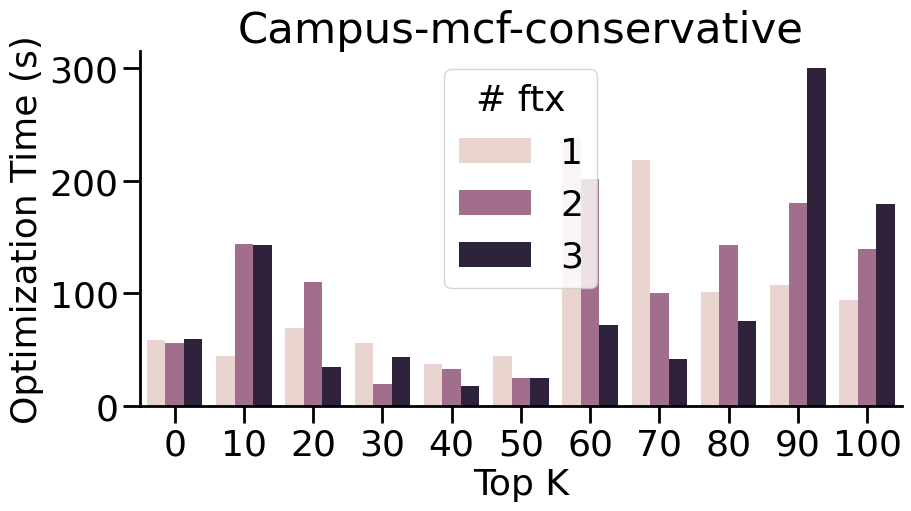

In [21]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
routing = "mcf"
net_df = campus_df[campus_df["Candidate Link Choice Method"] == "max"]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Optimization Time"],
    hue=net_df["# ftx"],
)

plt.ylabel("Optimization Time (s)")
plt.title(f"{net}-{routing}-conservative")

# 1/25/2024
## Doppler Experiment. 

    network = ["Campus", "Regional"]    
    traffic = ["background"]
    scale = ["0.5"]
    te = ["mcf"]
    tp = ["Doppler"]
    top_k = [10 * i for i in range(11)]
    n_ftx = [1, 2, 3]
    use_cached_result = [True]
    candidate_link_choice_method = ["conservative", "max"]
    optimizer_time_limit_minutes = [0.5, 1, 5]

In [24]:
campus_df = pd.read_csv(
    "data/archive/doppler-ecmo-1-25-24/reports/mcf-Doppler-Campus-background.csv"
)
regional_df = pd.read_csv(
    "data/archive/doppler-ecmo-1-25-24/reports/mcf-Doppler-Regional-background.csv"
)

Text(0.5, 1.0, 'Campus - Link Choice: max\nTime Limit (m): 0.5')

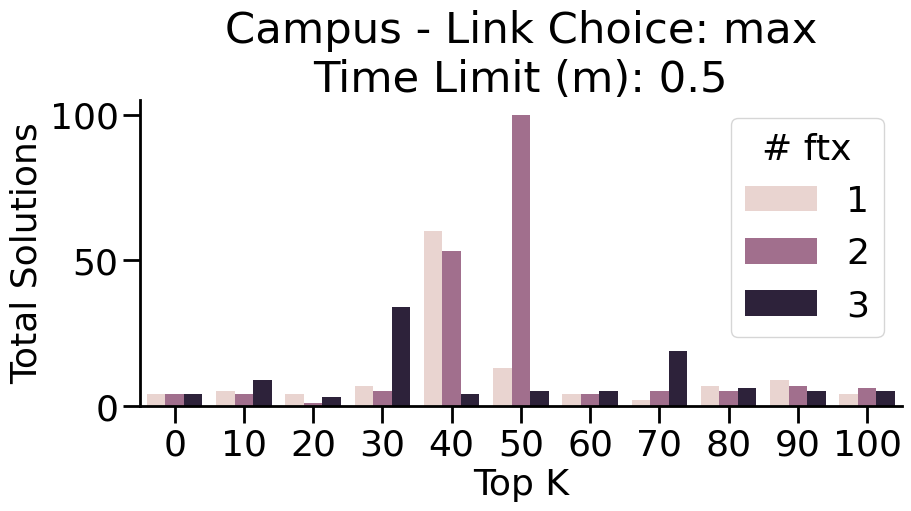

In [33]:
fix, ax = plt.subplots(figsize=(9, 5))
net = "Campus"
candidate_link_choice = "max"
time_limit = 0.5
net_df = campus_df[
    campus_df["Candidate Link Choice Method"] == candidate_link_choice
]
net_df = net_df[net_df["Time Limit (m)"] == time_limit]

sns.barplot(
    net_df,
    x=net_df["Top K"],
    y=net_df["Total Solutions"],
    hue=net_df["# ftx"],
)
for hatch, patch in zip(hatches, ax.artists):
    patch.set_hatch(hatch)


plt.title(
    f"{net} - Link Choice: {candidate_link_choice}\nTime Limit (m): {time_limit}"
)

/tmp/ipykernel_2145789/2942655183.py:13: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(


Text(0.5, 1.0, 'Campus - Link Choice: conservative\nTime Limit (m): 0.5')

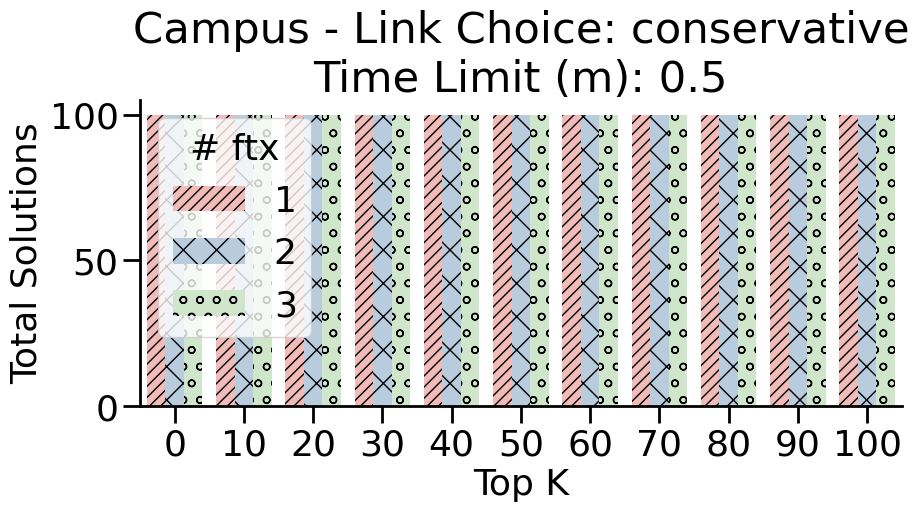

In [186]:
fix, ax = plt.subplots(figsize=(9, 5))
sns.set_palette(sns.color_palette(palette="Pastel1"))

net = "Campus"
candidate_link_choice = "conservative"
time_limit = 0.5
net_df = campus_df[
    campus_df["Candidate Link Choice Method"] == candidate_link_choice
]
net_df = net_df[net_df["Time Limit (m)"] == time_limit]


sns.barplot(
    x="Top K",
    y="Total Solutions",
    hue="# ftx",
    data=net_df,
    palette=sns.color_palette(palette="Pastel1"),
)
handles = {}
hatches = cycle(["///", "x", "o"])
num_bar_types = len(net_df["# ftx"].unique())
num_bar_groups = len(net_df["Top K"].unique())
handles = []

for i, patch in enumerate(ax.patches):
    if i % num_bar_groups == 0:
        if len(handles) < num_bar_types:
            handles.append(patch)
        hatch = next(hatches)
    patch.set_hatch(hatch)

legend_patches = [p for p in ax.patches[-3:]]
for p in legend_patches:
    p.set_hatch(hatch)
    hatch = next(hatches)

ax.legend(handles=legend_patches, loc=2, title="# ftx", ncol=1)
plt.title(
    f"{net} - Link Choice: {candidate_link_choice}\nTime Limit (m): {time_limit}"
)

In [122]:
campus_df = pd.read_csv(
    "data/archive/doppler-ecmo-1-25-24/reports/mcf-Doppler-Campus-background.csv"
)
regional_df = pd.read_csv(
    "data/archive/doppler-ecmo-1-25-24/reports/mcf-Doppler-Regional-background.csv"
)

x =  Top K
y =  Total Solutions
hue =  # ftx
net =  Campus
time_limit =  1
candidate_link_choice =  max
patches:  ['Rectangle(xy=(-0.4, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(0.6, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(1.6, 0), width=0.266667, height=6, angle=0)', 'Rectangle(xy=(2.6, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(3.6, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(4.6, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(5.6, 0), width=0.266667, height=6, angle=0)', 'Rectangle(xy=(6.6, 0), width=0.266667, height=39, angle=0)', 'Rectangle(xy=(7.6, 0), width=0.266667, height=56, angle=0)', 'Rectangle(xy=(8.6, 0), width=0.266667, height=100, angle=0)', 'Rectangle(xy=(9.6, 0), width=0.266667, height=23, angle=0)', 'Rectangle(xy=(-0.133333, 0), width=0.266667, height=29, angle=0)', 'Rectangle(xy=(0.866667, 0), width=0.266667, height=29, angle=0)', 'Rectangle(xy=(1.86667, 0), width=0.266667, height=100, angle=0

/tmp/ipykernel_2145789/1201600979.py:41: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(


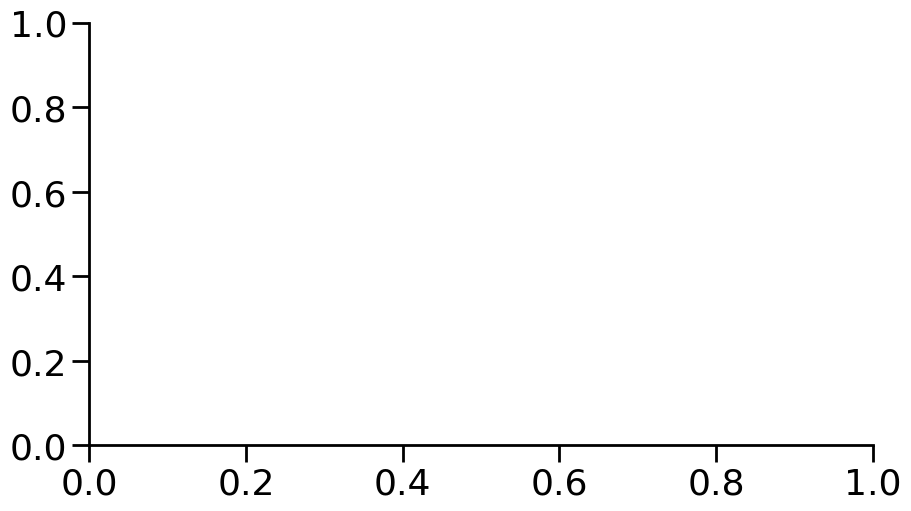

<Figure size 900x500 with 0 Axes>

In [181]:
fix, ax = plt.subplots(figsize=(9, 5))
sns.set_palette(sns.color_palette(palette="Pastel1"))
net = "Campus"
candidate_link_choice = "conservative"
time_limit = 0.5
my_barplot(
    campus_df,
    "Campus",
    "max",
    1,
    "Top K",
    "Total Solutions",
    "# ftx",
    "test",
)

In [147]:
# 1/25/2024
## Doppler Experiment.

network = ["Campus", "Regional"]
traffic = ["background"]
scale = ["0.5"]
te = ["mcf"]
tp = ["Doppler"]
top_k = [10 * i for i in range(11)]
n_ftx = [1, 2, 3]
use_cached_result = [True]
candidate_link_choice_method = ["conservative", "max"]
optimizer_time_limit_minutes = [0.5, 1, 5]

In [267]:
dfs = {"Campus": campus_df, "Regional": regional_df}
vars = ["Total Solutions", "Optimization Time", "Doppler Min MLU"]
for network, df in dfs.items():
    for choice, t_limit in product(
        candidate_link_choice_method, optimizer_time_limit_minutes
    ):
        for var in vars:
            plot_name = f"data/archive/doppler-ecmo-1-25-24/img/{network}-{choice}-{t_limit}-{var}".replace(
                " ", "_"
            )
            # print(f"{network}-{choice}-{t_limit}-{var}")
            my_barplot(
                df,
                network,
                choice,
                t_limit,
                "Top K",
                var,
                "# ftx",
                plot_name,
                True,
            )
    #         break
    #     break
    # break

Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-0.5-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-0.5-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-0.5-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-1-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-1-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-1-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-5-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-5-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-conservative-5-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Campus-max-0.5-Total_Solutions.pdf
Saved figure to: data/arc

/tmp/ipykernel_2145789/1859006354.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9, 5))


Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-0.5-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-1-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-1-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-1-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-5-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-5-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-conservative-5-Doppler_Min_MLU.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-max-0.5-Total_Solutions.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-max-0.5-Optimization_Time.pdf
Saved figure to: data/archive/doppler-ecmo-1-25-24/img/Regional-max-0.5-Doppler_Min_MLU.pdf
Saved figure to: data/a

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

In [268]:
plt.close()